In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve

In [3]:
df = pd.read_csv('hearing_test.csv')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
null = df.isnull().sum()

In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


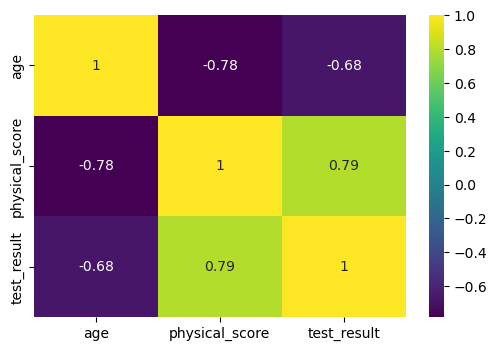

In [8]:
plt.figure(dpi = 100)
sns.heatmap(df.corr(), cmap = 'viridis', annot = True);

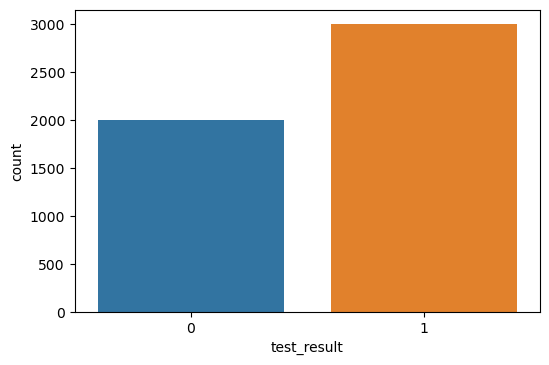

In [9]:
plt.figure(dpi = 100)
sns.countplot(x = 'test_result', data = df);

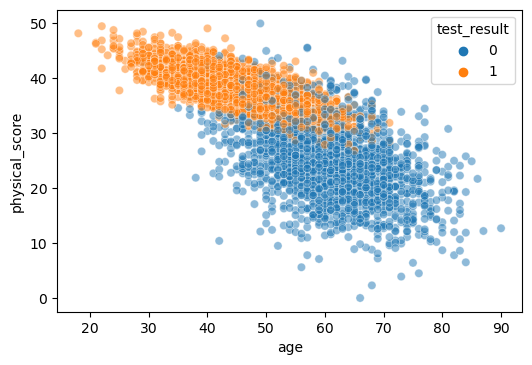

In [10]:
plt.figure(dpi = 100)
sns.scatterplot(x = 'age',y = 'physical_score', data = df, hue = 'test_result', alpha = 0.5);

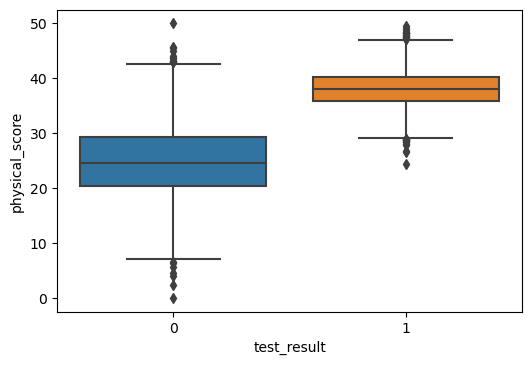

In [11]:
plt.figure(dpi = 100)
sns.boxplot(x = 'test_result', y = 'physical_score', data = df);

<Figure size 600x400 with 0 Axes>

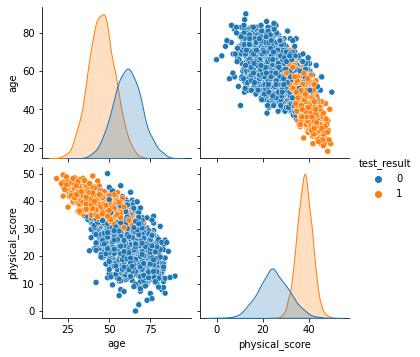

In [12]:
plt.figure(dpi = 100)
sns.pairplot(data = df, vars = ['age','physical_score'], hue = 'test_result');

In [13]:
X = df.drop('test_result', axis = 1)

In [14]:
y = df['test_result']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [ ]:
param = {'penalty':['l1','l2', 'elasticnet'],
         'l1_ratio': np.linspace(0,1,10),
         'C': np.linspace(0,10,20)}

In [ ]:
grid_model = GridSearchCV(estimator = log_model, param_grid = param)